# Generic Data processing 

Use this template in case you have data different from Affymetrix, Agilent or GEO.

A microarray experiment produces one set of images which are transformed into numerical values representing absolute (single- channel) or relative (two-channel) intensities. As in any statistical analysis, and particularly in image analysis, the quality of the data must be checked first. High throughput data have an additional difficulty: the huge data matrices obtained make it virtually impossible to detect most problems by visual inspection, what has led to the development of specific quality control procedures.

1. Assess the quality of the data with QC plots
2. A background correction must be performed to remove signal due to nonspecific hybridization, that is signal emitted by other things than sample hybridized to probe.
2. A normalization of the data must be done to correct for systematic biases due to causes such as different dye  absorption, spatial heterogeneity in the chip or others. (MA plot after this)
3. The log transformation improves the characteristics of the data distribution and allows the use of classical parametric statistics for analysis.
5. Optional Batch effect removal

We are using untreated expression data from GSE48350 as an example.


In [1]:
suppressPackageStartupMessages(library(limma))

In [2]:
expression<-read.table("/mnt/data/GWES/Microarray/input//rawexpression.GSE48350")
dim(expression)
head(expression)

[1] 54675   253

,GSM1176196_1105A.08_EC_48_Affy.CEL.gz,GSM1176197_1105A.08_EC_15.CEL.gz,GSM1176198_1205A.07_EC.09_AffyHyb.CEL.gz,GSM1176199_1205A.07_EC.24_AffyHyb.CEL.gz,GSM1176200_1205A.07.EC.36_AffyHyb.CEL.gz,GSM1176201_1205A.07_EC.06_AffyHyb.CEL.gz,GSM1176202_1105A.08_EC_75_Affy.CEL.gz,GSM1176203_1105A.08_EC_11.CEL.gz,GSM1176204_1205A.07.EC.69_AffyHyb.CEL.gz,GSM1176205_1105A.08_EC_51.CEL.gz,...,GSM300331.CEL.gz,GSM300332.CEL.gz,GSM300333.CEL.gz,GSM300335.CEL.gz,GSM300338.CEL.gz,GSM300339.CEL.gz,GSM300340.CEL.gz,GSM300341.CEL.gz,GSM318840.CEL.gz,GSM350078.CEL.gz
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_s_at,12.394128,11.123872,11.803798,11.692132,11.350636,10.956398,11.368155,11.013278,11.636705,10.305988,...,10.902029,10.924181,11.651109,11.048145,10.880234,11.523063,11.075949,10.354721,10.729288,10.922141
1053_at,7.944143,7.105460,7.390089,7.447992,7.098794,7.358775,7.107468,7.148788,7.196441,7.198426,...,7.649051,7.064992,7.316486,7.736770,7.554007,7.639822,7.510048,7.453667,7.137704,7.481174
117_at,7.661491,6.819810,7.492905,7.485799,7.118843,7.102791,7.017586,6.793902,7.043414,6.990595,...,7.108268,6.850376,7.248748,7.319013,7.221960,7.208337,6.915389,7.063347,7.145847,7.072205
121_at,9.004963,8.398538,8.788830,8.697828,8.364565,8.390265,8.111911,8.140146,8.549257,8.562996,...,8.380761,8.238718,8.861260,8.699488,8.665457,8.886721,8.385394,8.478072,8.170496,8.347384
1255_g_at,6.962178,6.544466,6.660004,6.708607,6.414810,6.901698,6.313069,6.338083,6.498695,6.609909,...,6.741303,6.390784,7.320025,6.714583,7.120016,7.030783,6.645354,6.661693,6.158396,6.691906
1294_at,8.324121,7.576727,7.952321,8.104929,7.587847,7.799112,7.731195,7.183718,7.802380,7.446954,...,7.760172,7.441142,7.847903,7.760327,7.872511,7.965288,7.745196,7.592926,7.739884,7.808985


## Assess quality

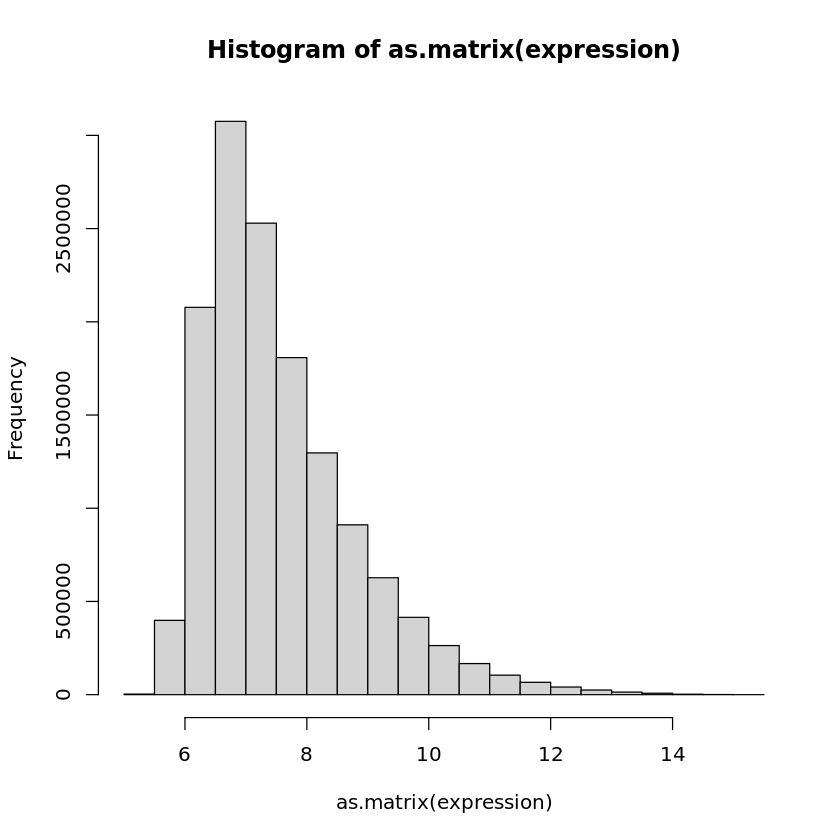

In [3]:
hist(as.matrix(expression))

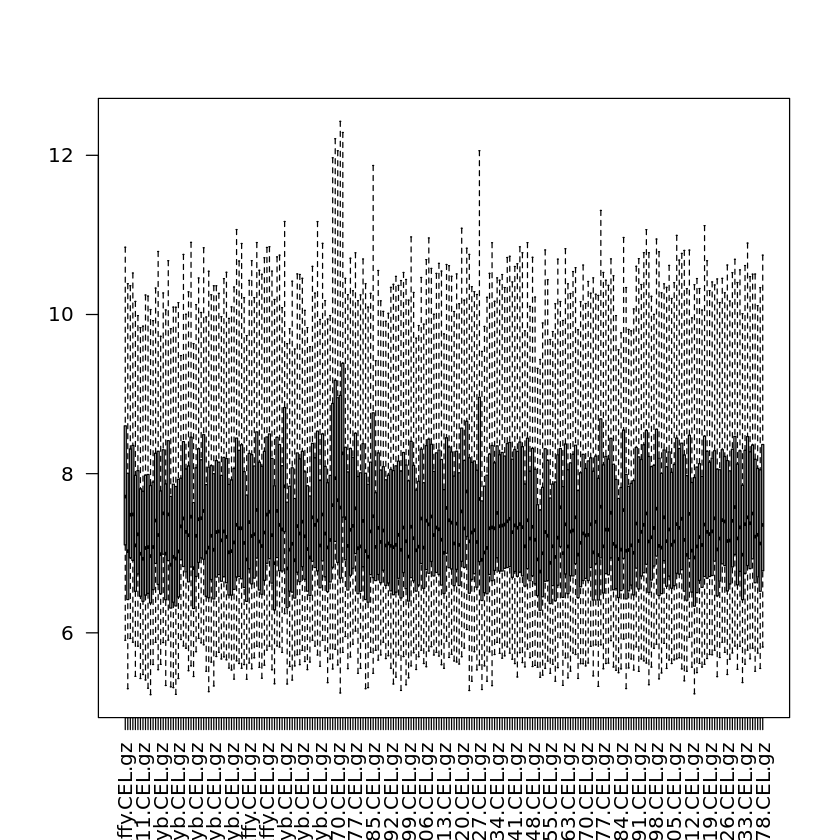

In [4]:
boxplot(expression, las=2, outline=F)

Inspecting the plots we can see the data needs background correction, normalization and log transformation.

## Background correction

This function implements the background correction methods reviewed or developed in Ritchie et al (2007) and Silver at al (2009). 

In [5]:
expression.corrected<-backgroundCorrect.matrix(expression)
head(expression.corrected)

Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected
Array 6 corrected
Array 7 corrected
Array 8 corrected
Array 9 corrected
Array 10 corrected
Array 11 corrected
Array 12 corrected
Array 13 corrected
Array 14 corrected
Array 15 corrected
Array 16 corrected
Array 17 corrected
Array 18 corrected
Array 19 corrected
Array 20 corrected
Array 21 corrected
Array 22 corrected
Array 23 corrected
Array 24 corrected
Array 25 corrected
Array 26 corrected
Array 27 corrected
Array 28 corrected
Array 29 corrected
Array 30 corrected
Array 31 corrected
Array 32 corrected
Array 33 corrected
Array 34 corrected
Array 35 corrected
Array 36 corrected
Array 37 corrected
Array 38 corrected
Array 39 corrected
Array 40 corrected
Array 41 corrected
Array 42 corrected
Array 43 corrected
Array 44 corrected
Array 45 corrected
Array 46 corrected
Array 47 corrected
Array 48 corrected
Array 49 corrected
Array 50 corrected
Array 51 corrected
Array 52 corrected
Array 53 corrected
Ar

,GSM1176196_1105A.08_EC_48_Affy.CEL.gz,GSM1176197_1105A.08_EC_15.CEL.gz,GSM1176198_1205A.07_EC.09_AffyHyb.CEL.gz,GSM1176199_1205A.07_EC.24_AffyHyb.CEL.gz,GSM1176200_1205A.07.EC.36_AffyHyb.CEL.gz,GSM1176201_1205A.07_EC.06_AffyHyb.CEL.gz,GSM1176202_1105A.08_EC_75_Affy.CEL.gz,GSM1176203_1105A.08_EC_11.CEL.gz,GSM1176204_1205A.07.EC.69_AffyHyb.CEL.gz,GSM1176205_1105A.08_EC_51.CEL.gz,...,GSM300331.CEL.gz,GSM300332.CEL.gz,GSM300333.CEL.gz,GSM300335.CEL.gz,GSM300338.CEL.gz,GSM300339.CEL.gz,GSM300340.CEL.gz,GSM300341.CEL.gz,GSM318840.CEL.gz,GSM350078.CEL.gz
1007_s_at,5.5081482,5.0319319,5.1398448,5.0758064,5.1072773,4.5218836,5.1986429,4.9322501,5.4691743,4.0867435,...,4.5033427,4.7995865,5.1832968,4.5661832,4.3345835,4.8291015,4.7895587,3.9402094,4.5370832,4.5250432
1053_at,1.0623828,1.0144561,0.7307408,0.8345934,0.8593455,0.9242962,0.9382310,1.0677749,1.0294712,0.9816605,...,1.2503644,0.9413702,0.8560563,1.2548181,1.0105368,0.9507961,1.2236718,1.0393408,0.9459837,1.0840816
117_at,0.7985252,0.7381558,0.8306812,0.8715404,0.8787936,0.6697985,0.8488922,0.7148928,0.8783723,0.7828661,...,0.7100755,0.7326669,0.7925925,0.8389226,0.6983573,0.5722106,0.6397303,0.6583473,0.9540823,0.6771978
121_at,2.1189832,2.3065975,2.1248769,2.0815019,2.1212062,1.9557510,1.9423988,2.0591178,2.3817269,2.3437517,...,1.9820744,2.1141235,2.3934476,2.2175258,2.1198065,2.1927593,2.0990044,2.0635600,1.9782917,1.9502864
1255_g_at,0.3431505,0.5050259,0.2269975,0.2797295,0.3310779,0.4799158,0.2776605,0.3293576,0.4145538,0.4740703,...,0.3705496,0.3674711,0.8594141,0.3398203,0.6124385,0.4515468,0.4180763,0.3471028,0.2163704,0.3474657
1294_at,1.4383374,1.4847899,1.2883727,1.4886039,1.3445110,1.3645977,1.5616832,1.1026981,1.6348502,1.2279573,...,1.3614859,1.3165578,1.3801480,1.2783727,1.3269641,1.2716469,1.4588061,1.1784436,1.5476796,1.4118877


## Normalization quantile

Normalization is necessary before analysis is performed, in order to ensure that differences in intensities are indeed
 due to differential expression and not experimental artifacts.

normalize.quantiles {preprocessCore} algorithm maps every value on any one chip to the corresponding quantile of the standard distribution. It makes the distribution of probe intensities the same for all arrays (samples). No special allowances are made for outliers. [1]. This functions will handle missing data (ie NA values), based on the assumption that the data is missing at random.

[1]Benjamin Milo Bolstad (2017). preprocessCore: A collection of pre-processing functions. R package version 1.38.1.


In [6]:
suppressPackageStartupMessages(library(preprocessCore))

In [7]:
expr.norm<-normalize.quantiles(as.matrix(expression.corrected))
head(expr.norm)

5.5839380,4.8254615,5.4813457,5.1209069,5.2760943,4.9242831,5.5761565,5.1349890,5.4453879,4.0925368,...,4.3787511,4.9558467,5.2615294,4.2451626,4.4434388,4.970747,4.6651286,4.1773650,4.6254470,4.2671402
1.1226434,0.9654995,0.7950402,0.8503805,0.8908400,1.0282829,1.0135159,1.1191287,1.0165921,1.0127064,...,1.2040303,0.9762887,0.8477652,1.1554480,1.0690195,1.036830,1.1761440,1.1355000,0.9043393,1.0081743
0.8424969,0.7062526,0.9019956,0.8891977,0.9105208,0.7426300,0.9165581,0.7512926,0.8702631,0.8073785,...,0.6859125,0.7612935,0.7876078,0.7753918,0.7375134,0.612489,0.6168887,0.7150183,0.9122460,0.6258354
2.2270232,2.1907963,2.3467299,2.1726036,2.2199488,2.2039387,2.1475826,2.1978579,2.3949758,2.3856748,...,1.8999945,2.2348622,2.4063607,2.0182457,2.2150414,2.371464,2.0074714,2.2549068,1.9396817,1.7934695
0.3186902,0.4829331,0.2409289,0.2812086,0.3325205,0.5361163,0.3041652,0.3557854,0.4141936,0.4757134,...,0.3751352,0.3796070,0.8505301,0.3212757,0.6445868,0.467290,0.4082582,0.3696572,0.2184764,0.3421971
1.5192582,1.4104104,1.4041471,1.5400012,1.3897662,1.5294368,1.7179460,1.1549121,1.6242880,1.2636258,...,1.3089440,1.3663566,1.3586458,1.1759744,1.3972250,1.384512,1.4015891,1.2871038,1.4897201,1.3125646


In [8]:
rownames(expr.norm)<-rownames(expression.corrected)
colnames(expr.norm)<-colnames(expression.corrected)
head(expr.norm,n=3L)

,GSM1176196_1105A.08_EC_48_Affy.CEL.gz,GSM1176197_1105A.08_EC_15.CEL.gz,GSM1176198_1205A.07_EC.09_AffyHyb.CEL.gz,GSM1176199_1205A.07_EC.24_AffyHyb.CEL.gz,GSM1176200_1205A.07.EC.36_AffyHyb.CEL.gz,GSM1176201_1205A.07_EC.06_AffyHyb.CEL.gz,GSM1176202_1105A.08_EC_75_Affy.CEL.gz,GSM1176203_1105A.08_EC_11.CEL.gz,GSM1176204_1205A.07.EC.69_AffyHyb.CEL.gz,GSM1176205_1105A.08_EC_51.CEL.gz,...,GSM300331.CEL.gz,GSM300332.CEL.gz,GSM300333.CEL.gz,GSM300335.CEL.gz,GSM300338.CEL.gz,GSM300339.CEL.gz,GSM300340.CEL.gz,GSM300341.CEL.gz,GSM318840.CEL.gz,GSM350078.CEL.gz
1007_s_at,5.5839380,4.8254615,5.4813457,5.1209069,5.2760943,4.924283,5.5761565,5.1349890,5.4453879,4.0925368,...,4.3787511,4.9558467,5.2615294,4.2451626,4.4434388,4.970747,4.6651286,4.1773650,4.6254470,4.2671402
1053_at,1.1226434,0.9654995,0.7950402,0.8503805,0.8908400,1.028283,1.0135159,1.1191287,1.0165921,1.0127064,...,1.2040303,0.9762887,0.8477652,1.1554480,1.0690195,1.036830,1.1761440,1.1355000,0.9043393,1.0081743
117_at,0.8424969,0.7062526,0.9019956,0.8891977,0.9105208,0.742630,0.9165581,0.7512926,0.8702631,0.8073785,...,0.6859125,0.7612935,0.7876078,0.7753918,0.7375134,0.612489,0.6168887,0.7150183,0.9122460,0.6258354


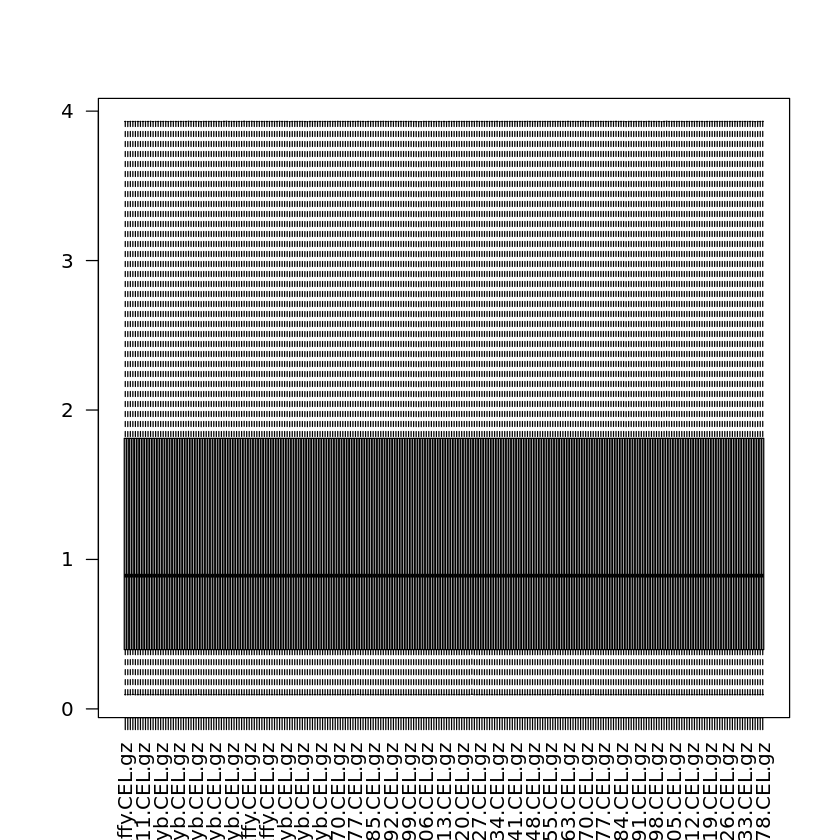

In [9]:
boxplot(expr.norm, las=2, outline=F)

## Log transformation
Using log-transformed expression values, you model proportional chances rather than additive changes. This is typically biologically more relevant. Also the errors are usually proportional to the values (the variance is not independent from the mean). This kind of mean-variance relationship is usually absent on the log scale. 
Apart from there merely phenomenological reasons there is some theoretical foundation for taking the logarithms, as for instance derived in Friedman N at al 2006. Linking stochastic dynamics to population distribution: an analytical framework of gene expression.

In [10]:
expr.norm.log<-log2(expr.norm)

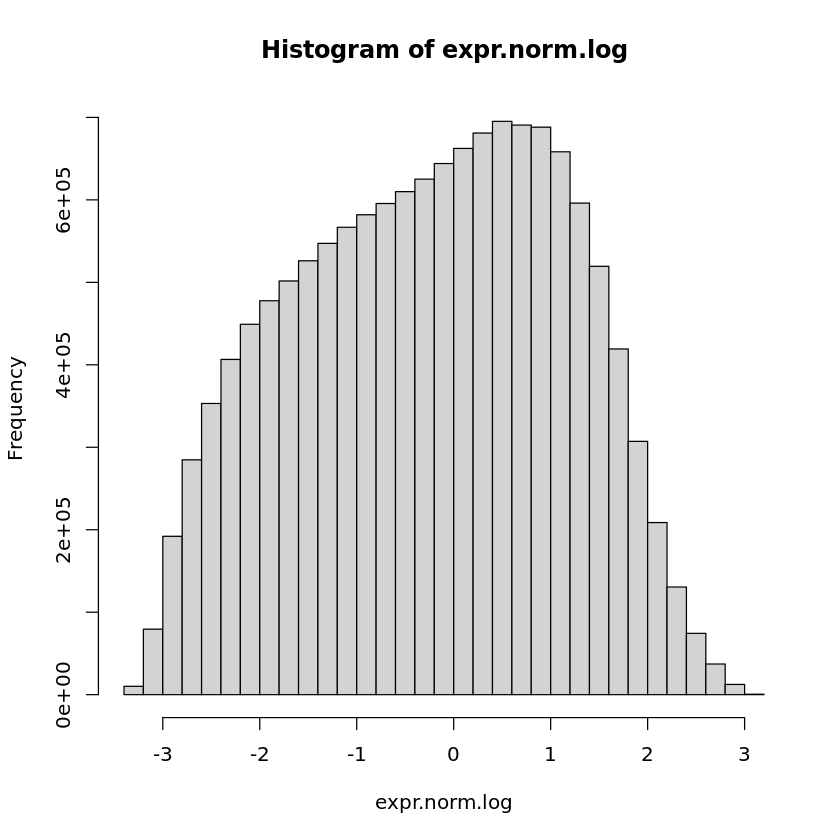

In [11]:
hist(expr.norm.log)

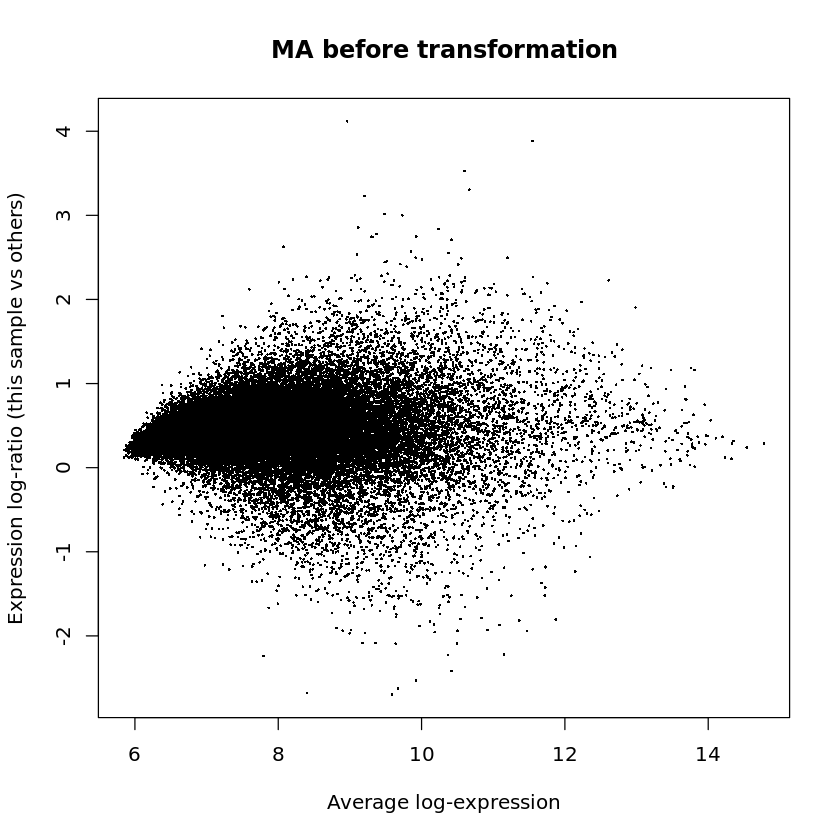

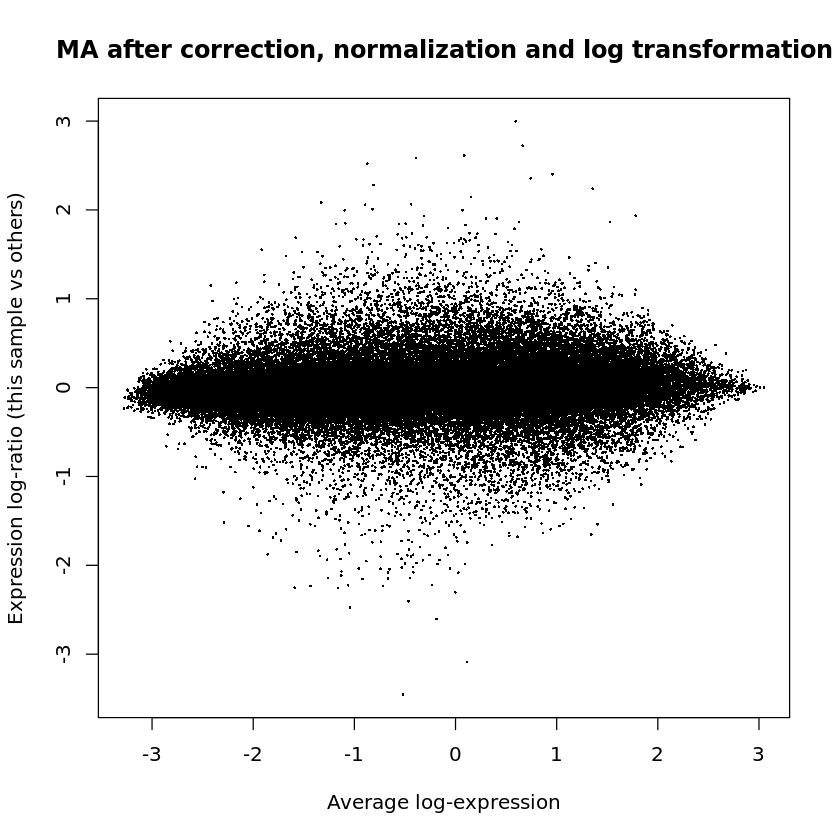

In [12]:
limma::plotMA(expression,main="MA before transformation")
limma::plotMA(expr.norm.log,main="MA after correction, normalization and log transformation")

In [ ]:
#save(expr.norm.log,"exprdata_prep.RData")

## Batch effect removal

Combat is a popular method and it is based on using linear models to adjust for batch effects. It fits a hierarchical model to estimate and remove row specific batch effects. Combat uses a modular approach.

In [ ]:
suppressPackageStartupMessages(library("sva"))

In [ ]:
# The phenoData / clinical set is needed here to correct for the wanted variable
modcombat = model.matrix(~1, data=clinical.data)
combat_data = ComBat(dat=expression.data, batch=clinical.data$Batch, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)
head(combat_data,n=3L)

In [ ]:
#save(combat_data,"batch.corrected.RData")